In [44]:
import pandas as pd
import warnings

In [16]:
data=pd.read_csv("../../datasets/insurance.csv")

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [20]:
data["sex"]=data.sex.map({"male":0,"female":1})

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [23]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [25]:
data["smoker"]=data.smoker.map({"yes":1,"no":0})

In [27]:
data.sample()

,age,sex,bmi,children,smoker,region,charges
1032,30,1,27.93,0,0,northeast,4137.5227


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [30]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [33]:
data=pd.get_dummies(data,columns=["region"])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [35]:
X=data.drop("charges",axis=1)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   region_northeast  1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 57.6 KB


In [38]:
Y=data[["charges"]]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,train_size=0.7)

In [45]:
import tensorflow as tf

In [87]:
model=tf.keras.models.Sequential()

In [88]:
X.shape

(1338, 9)

In [89]:
model.add(tf.keras.layers.Dense(4,input_shape=(9,)\
                                ,activation="relu"))
model.add(tf.keras.layers.Dense(4,activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [90]:
model.compile(optimizer="adam",loss="mse")

In [91]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 40        
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [98]:
his=model.fit(X_train,Y_train,epochs=2000)

Epoch 1/2000
30/30 [==============================] - 0s 1ms/step - loss: 93231504.0000
Epoch 2/2000
30/30 [==============================] - 0s 1ms/step - loss: 93114256.0000
Epoch 3/2000
30/30 [==============================] - 0s 1ms/step - loss: 92929984.0000
Epoch 4/2000
30/30 [==============================] - 0s 1ms/step - loss: 92804712.0000
Epoch 5/2000
30/30 [==============================] - 0s 1ms/step - loss: 92647744.0000
Epoch 6/2000
30/30 [==============================] - 0s 1ms/step - loss: 92518472.0000
Epoch 7/2000
30/30 [==============================] - 0s 1ms/step - loss: 92365224.0000
Epoch 8/2000
30/30 [==============================] - 0s 1ms/step - loss: 92230768.0000
Epoch 9/2000
30/30 [==============================] - 0s 1ms/step - loss: 92108296.0000
Epoch 10/2000
30/30 [==============================] - 0s 1ms/step - loss: 91939192.0000
Epoch 11/2000
30/30 [==============================] - 0s 1ms/step - loss: 91824600.0000
Epoch 12/2000
30/30 [=========

In [99]:
import matplotlib.pyplot as plt

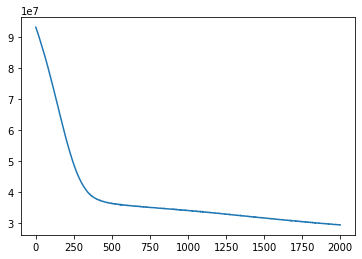

In [100]:
plt.plot(his.epoch,his.history.get("loss"))

In [101]:
pred=model.predict(x_test)

13/13 [==============================] - 0s 2ms/step


In [102]:
import numpy as np
from sklearn.metrics  import mean_squared_error

In [103]:
mean_squared_error(pred,y_test)

37666226.41888088